***
In this notebook, we will briefly demonstrate how calibration would work by changing some of the SPHY model input parameters in the configuration file.

Calibration involves an iterative process with trial and error based on the understandings of hydrologic formulations and parameters. We would suggest finding details from the SPHY user manual (SPHY_manualV6.pdf) to specifically understand hydrologic representations in the SPHY model.

Here, we're going to modify some of the hydrologic input parameters and check the changes on the SPHY output results that we saw in the previous notebook. The following hydrologic parameters have been updated within the configuration file - */trainings/202405-Bhutan/runs/revision/sphy_config_Bhutan_rev.cfg*:
- [GROUNDW_PARS] deltaGw = 300 -> 1 # GROUNDWATER RECHARGE DELAY TIME (delay in groundwater recharge (days)).
- [GROUNDW_PARS] alphaGw = 0.5 -> 0.01 # BASEFLOW DAYS (parameter of baseflow days: alfaGw = 2.3/X (X = nr. of baseflow days)).
- [GLACIER] DDFG = 4 -> 6 # GLACIER (clean ice) DEGREE DAY FACTOR (degree day factor for glacier (mm degree-1 day-1)).
- [GLACIER] DDFDG = 2 -> 3 # # GLACIER DEBRIS DEGREE DAY FACTOR (degree day factor for glacier (mm degree-1 day-1)).
- [SNOW] DDFS = 5 -> 4.8 # SNOW DEGREE DAY FACTOR (mm degree-1 day-1).
- [ROUTING] kx = 0.765 -> 0.958895 # RECESSION ROUTING COEF (recession coefficient of routing (-))


While the changes are currently made for the scalars, we could also update the input PCRaster map files that represent hydrologic properties for calibration.
***

# 00. Before Running SPHY

Now, we're working on a new run directory: */trainings/202405-Bhutan/runs/revision/*

In the configuration file, all the input and output paths are relative to the following **[DIRS]** configuration:<br>
**[DIRS]**<br>
inputdir 		= ../input/<br>
outputdir 		= ../runs/revision/<br>

Then, the **[DIRS]** configuration should be based on the current working directory. Let's check it again in a command line mode.

In [1]:
%%bash
pwd # current working directory
ls -l ../../../sphy.py # path for the SPHY model 
ls -l ../runs/revision/sphy_config_Bhutan_rev.cfg # path for the configuration file

/Users/sony061/Library/CloudStorage/OneDrive-PNNL/Codes/SPHY/trainings/202405-Bhutan/scripts
-rwx------@ 1 sony061  staff  38387 Apr 26 14:47 ../../../sphy.py
-rwx------@ 1 sony061  staff  49351 Apr 26 23:19 ../runs/revision/sphy_config_Bhutan_rev.cfg


# 01. Run SPHY

We're going to run the SPHY model with python in a command line mode.

In [2]:
%%bash
python ../../../sphy.py ../runs/revision/sphy_config_Bhutan_rev.cfg # run SPHY

The Spatial Processes in HYdrology (SPHY) model is
developed and owned by FutureWater, Wageningen, The Netherlands
Version 3.0, released June 2019
 
groundwater module imported
glacier module imported
snow module imported
routing module imported
Running SPHY for 1-1-2002 through 31-12-2004
with 1096 daily timesteps
wbal will be reported
TotStor will NOT be reported
RainStor will NOT be reported
SnowStor will NOT be reported
GlacStor will NOT be reported
BaseStor will NOT be reported
TotPrec will be reported
TotPrecF will NOT be reported
TotPrecEF will NOT be reported
LAI will NOT be reported
TotIntF will NOT be reported
TotRain will NOT be reported
TotRainF will NOT be reported
TotETref will NOT be reported
TotETrefF will NOT be reported
TotETpot will NOT be reported
TotETpotF will NOT be reported
TotETact will NOT be reported
TotETactF will NOT be reported
PlantStress will NOT be reported
TotSnow will be reported
TotSnowF will NOT be reported
TotSnowMelt will NOT be reported
TotSnowMe

# 02. After Running SPHY

After completing the new SPHY run, we can find the SPHY output files in */trainings/202405-Bhutan/runs/revision/*.<br>
These outputs are generated during the SPHY run, based on the output options set in */trainings/202405-Bhutan/input/prep/reporting.csv*.

Let's first check wheter there are any changes on the output files in the pcratser format.

In [3]:
### Load Packages
import os
import pcraster as pcr
import pcr_tool, output_tool

import cartopy

### Basic Setup for a Bhutan watersged (Punatsangchhu, Wangchhu, Amochhu, and Jaldakah)
epsg_model = 5266 # Bhutan National Grid: a transverse Mercator projection

path_data = os.path.join('..', 'data')
path_input = os.path.join('..', 'input')
path_run = os.path.join('..', 'runs', 'initial')
path_run_rev = os.path.join('..', 'runs', 'revision')

# Bhutan Administrative Boundaries (Level 1) to be added in a plot
path_shape = os.path.join(path_data, 'SHAPE', 'btn_admbnda_adm1_bnlc_20201026.shp')
shape_geometry = cartopy.io.shapereader.Reader(path_shape).geometries()
shape_feature = cartopy.feature.ShapelyFeature(shape_geometry, crs = cartopy.crs.PlateCarree(), facecolor = 'none', linewidth = 0.25)

### Load Clonemap and Points of Interest
map_clone = pcr_tool.clonemap(epsg = epsg_model)
path_clonemap = os.path.join(path_input, 'clone.map')
path_PoI = os.path.join(path_input, 'outlet.map')
map_clone.load_clonemap(path = path_clonemap)

print(f'- Input EPSG:\n{epsg_model}')
print(f'- Input PCRaster Path for Clonemap:\n{path_clonemap}')

os.environ['HTTPS_PROXY'] = 'http://proxy01.pnl.gov:3128'
os.environ['https_proxy'] = 'http://proxy01.pnl.gov:3128'

- Input EPSG:
5266
- Input PCRaster Path for Clonemap:
../input/clone.map


- Path for Output Map:
../runs/revision/TotrY001.096


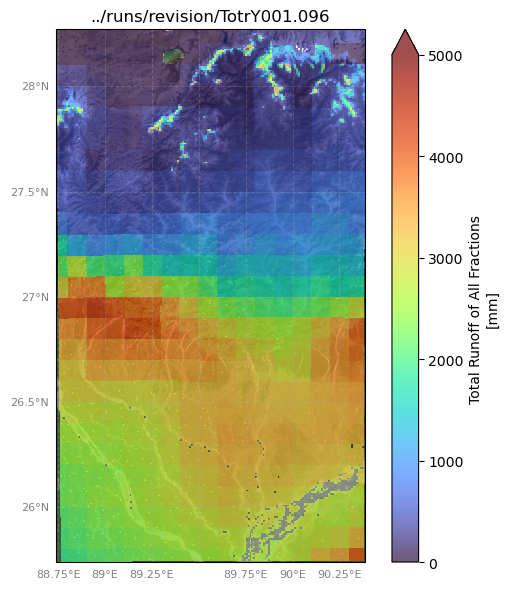

- Path for Output Map:
../runs/initial/TotrY001.096


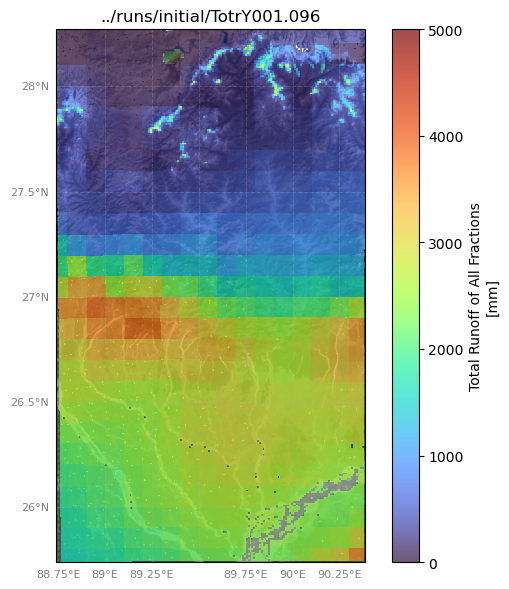

In [4]:
# Example 1: TOTAL RUNOFF OF ALL FRACTIONS - TotrY001.096 (Last Year in Simulation Period)
fn_map1 = 'TotrY001.096' # pcraster.Field to read

# Revision Run
path_map1_rev = os.path.join(path_run_rev, fn_map1)
print(f'- Path for Output Map:\n{path_map1_rev}')

# plots
pcr.aguila(path_map1_rev)
map_clone.plot_cartopy(
    field = path_map1_rev, # pcraster.Field to plot
    shapes = [], # a list of cartopy.feature.ShapelyFeature to plot together
    figsize = (6, 6), # matplotlib figure size
    basemap = cartopy.io.img_tiles.GoogleTiles(style = 'satellite'), # cartopy basemap (here, Google Satellite Images)
    basemap_level = 10, # cartopy basemap zoom level
    extent = None, # cartopy map extent
    vmin = 0, # matplotlib contour min
    vmax = 5000, # matplotlib contour max
    cmap = 'turbo', # matplotlib contour colormap
    alpha = 0.7, # matplotlib contour transparency
    title = path_map1_rev, # matplotlib figure title
    clabel = 'Total Runoff of All Fractions [mm]', # matplotlib contour label
    savefig = None, # path to save the figure
    )

# Initial Run for Comparision
path_map1 = os.path.join(path_run, fn_map1)
print(f'- Path for Output Map:\n{path_map1}')

# plots
pcr.aguila(path_map1)
map_clone.plot_cartopy(
    field = path_map1, # pcraster.Field to plot
    shapes = [], # a list of cartopy.feature.ShapelyFeature to plot together
    figsize = (6, 6), # matplotlib figure size
    basemap = cartopy.io.img_tiles.GoogleTiles(style = 'satellite'), # cartopy basemap (here, Google Satellite Images)
    basemap_level = 10, # cartopy basemap zoom level
    extent = None, # cartopy map extent
    vmin = 0, # matplotlib contour min
    vmax = 5000, # matplotlib contour max
    cmap = 'turbo', # matplotlib contour colormap
    alpha = 0.7, # matplotlib contour transparency
    title = path_map1, # matplotlib figure title
    clabel = 'Total Runoff of All Fractions [mm]', # matplotlib contour label
    savefig = None, # path to save the figure
    )

The most noticeble changes in Bhutan is the increases in runoff across the glaciers on the mountains.<br>
Please note that the "vmin" and "vmax" arguments are now passed to match the contour scales.

- Path for Output Map:
../runs/revision/iceDepth_20041001.map


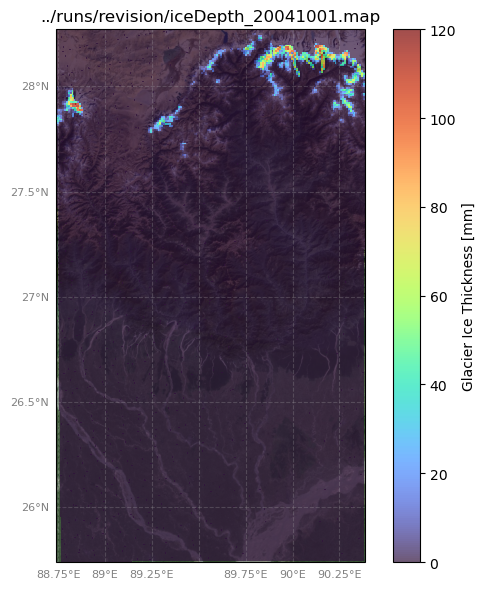

- Path for Output Map:
../runs/initial/iceDepth_20041001.map


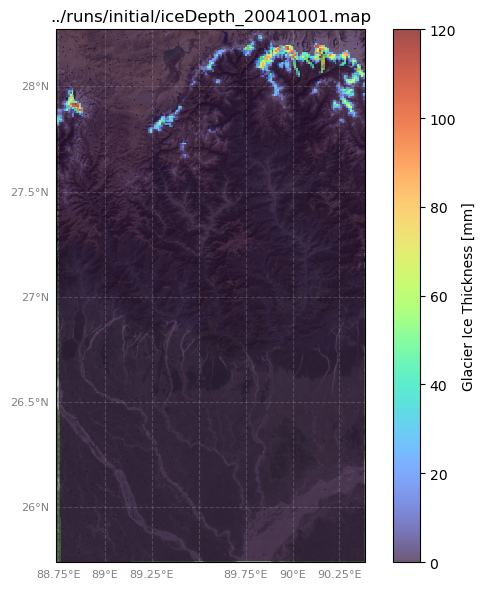

In [5]:
# Example 2: GLACIER ICE THICKNESS, iceDepth_20041001 (First Day of Last Water Year in Simulation Period)
fn_map2 = 'iceDepth_20041001.map' # pcraster.Field to read

# Revision Run
path_map2_rev = os.path.join(path_run_rev, fn_map2)
print(f'- Path for Output Map:\n{path_map2_rev}')

# plots
pcr.aguila(path_map2_rev)
map_clone.plot_cartopy(
    field = path_map2_rev, # pcraster.Field to plot
    shapes = [], # a list of cartopy.feature.ShapelyFeature to plot together
    figsize = (6, 6), # matplotlib figure size
    basemap = cartopy.io.img_tiles.GoogleTiles(style = 'satellite'), # cartopy basemap (here, Google Satellite Images)
    basemap_level = 10, # cartopy basemap zoom level
    extent = None, # cartopy map extent
    vmin = 0, # matplotlib contour min
    vmax = 120, # matplotlib contour max
    cmap = 'turbo', # matplotlib contour colormap
    alpha = 0.7, # matplotlib contour transparency
    title = path_map2_rev, # matplotlib figure title
    clabel = 'Glacier Ice Thickness [mm]', # matplotlib contour label
    savefig = None, # path to save the figure
    )

# Initial Run for Comparision
path_map2 = os.path.join(path_run, fn_map2)
print(f'- Path for Output Map:\n{path_map2}')

# plots
pcr.aguila(path_map2)
map_clone.plot_cartopy(
    field = path_map2, # pcraster.Field to plot
    shapes = [], # a list of cartopy.feature.ShapelyFeature to plot together
    figsize = (6, 6), # matplotlib figure size
    basemap = cartopy.io.img_tiles.GoogleTiles(style = 'satellite'), # cartopy basemap (here, Google Satellite Images)
    basemap_level = 10, # cartopy basemap zoom level
    extent = None, # cartopy map extent
    vmin = 0, # matplotlib contour min
    vmax = 120, # matplotlib contour max
    cmap = 'turbo', # matplotlib contour colormap
    alpha = 0.7, # matplotlib contour transparency
    title = path_map2, # matplotlib figure title
    clabel = 'Glacier Ice Thickness [mm]', # matplotlib contour label
    savefig = None, # path to save the figure
    )

It is hard to see the differences, probably due to the short period of the SPHY simulations with the marginal changes on the glacier hydrologic parameters.

Now, we can move to check for the timeseries output files (**.tss*).

In [6]:
# Example 3: ROUTED TOTAL RUNOFF at Chimakoti Dam (15) and at Hacchu (23), QAllDTS.tss (Timeseries over Simulation Period)
startyear, startmonth, startday = 2002, 1, 1 # it needs a start date as the output files have only the number of days elapsed.
fn_tss = 'QAllDTS.tss' # SPHY timeseries to read

# Revision Run
path_tss_rev = os.path.join(path_run_rev, fn_tss)
print(f'- Path for Output Timesereis:\n{path_tss_rev}')

# Initial Run for Comparision
path_tss = os.path.join(path_run, fn_tss)
print(f'- Path for Output Timesereis:\n{path_tss}')

- Path for Output Timesereis:
../runs/revision/QAllDTS.tss
- Path for Output Timesereis:
../runs/initial/QAllDTS.tss


- Point ID in ../input/outlet.map:
15
- Path for Observaiton Timesereis :
../runs/HYDRO-ChimakotiDam-2002-2004-15.csv


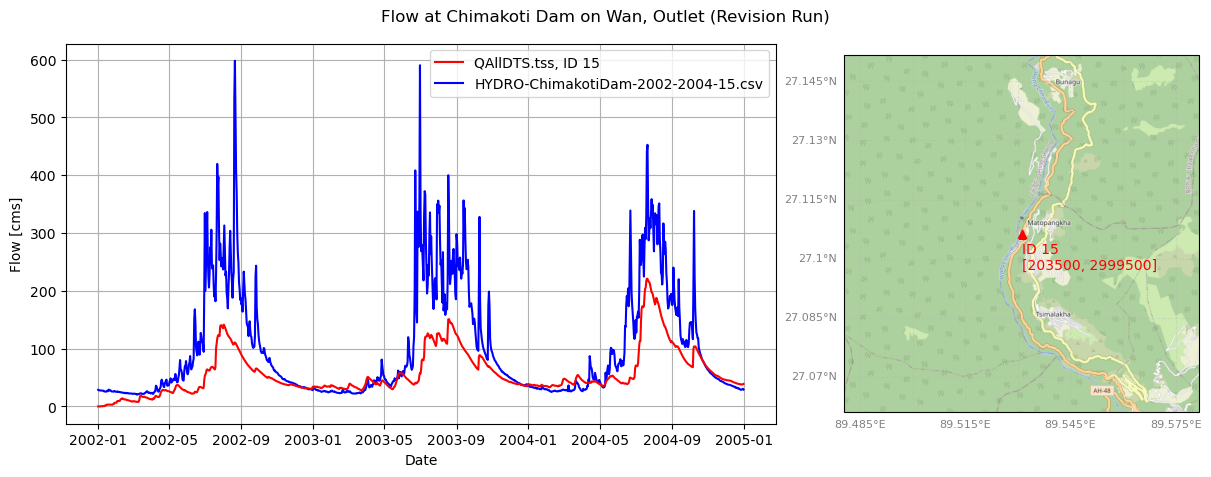

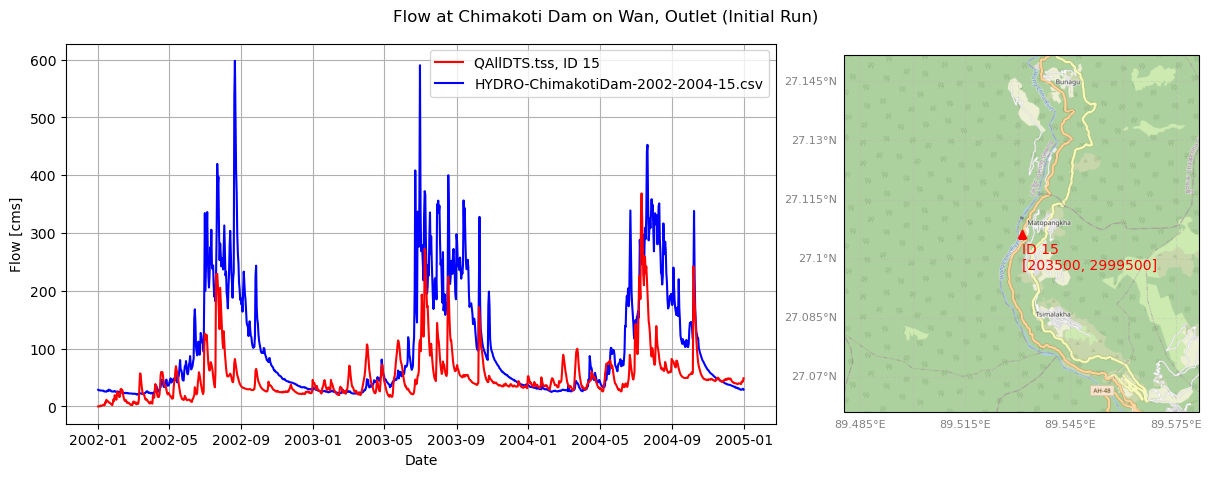

In [7]:
# at Chimakoti Dam
id_tss1 = 15 # Point ID
path_obs_tss1 = os.path.join('..', 'runs', 'HYDRO-ChimakotiDam-2002-2004-15.csv') # observation timeseries to read
print(f'- Point ID in {path_PoI}:\n{id_tss1}')
print(f'- Path for Observaiton Timesereis :\n{path_obs_tss1}')

# Revision Run
output_tool.plot_tss(
    path_tss = path_tss_rev, # SPHY timeseries to plot
    id_outlet = id_tss1, # Point ID to plot
    startyear = startyear, # SPHY simulation start year
    startmonth = startmonth, # SPHY simulation start month
    startday = startday, # SPHY simulation start day
    path_obscsv = path_obs_tss1, # observation timeseries to plot together
    plot_map = True, # add a panel to plot the Point location on the map
    path_outletmap = path_PoI, # outlet.map that contains location information
    outletmap_epsg = epsg_model, # outlet.map EPSG
    basemap = cartopy.io.img_tiles.OSM(), # cartopy basemap (here, OpenStreetMap)
    basemap_level = 13, # cartopy basemap zoom level
    extent = 5000, # cartopy map extent, e.g., 5 km from the Point location
    figsize = (12, 5), # matplotlib figure size
    suptitle = 'Flow at Chimakoti Dam on Wan, Outlet (Revision Run)', # matplotlib figure title
    xlabel = 'Date', # matplotlib figure x-axis label
    ylabel = 'Flow [cms]', # matplotlib figure y-axis label
    savefig = None, # path to save the figure
    )

# Initial Run for Comparision
output_tool.plot_tss(
    path_tss = path_tss, # SPHY timeseries to plot
    id_outlet = id_tss1, # Point ID to plot
    startyear = startyear, # SPHY simulation start year
    startmonth = startmonth, # SPHY simulation start month
    startday = startday, # SPHY simulation start day
    path_obscsv = path_obs_tss1, # observation timeseries to plot together
    plot_map = True, # add a panel to plot the Point location on the map
    path_outletmap = path_PoI, # outlet.map that contains location information
    outletmap_epsg = epsg_model, # outlet.map EPSG
    basemap = cartopy.io.img_tiles.OSM(), # cartopy basemap (here, OpenStreetMap)
    basemap_level = 13, # cartopy basemap zoom level
    extent = 5000, # cartopy map extent, e.g., 5 km from the Point location
    figsize = (12, 5), # matplotlib figure size
    suptitle = 'Flow at Chimakoti Dam on Wan, Outlet (Initial Run)', # matplotlib figure title
    xlabel = 'Date', # matplotlib figure x-axis label
    ylabel = 'Flow [cms]', # matplotlib figure y-axis label
    savefig = None, # path to save the figure
    )

Which SPHY model run do you think is closer to the streamflow gauge observation?

- Point ID in ../input/outlet.map:
23
- Path for Observaiton Timesereis :
../runs/HYDRO-Hacchu-2002-2004-23.csv


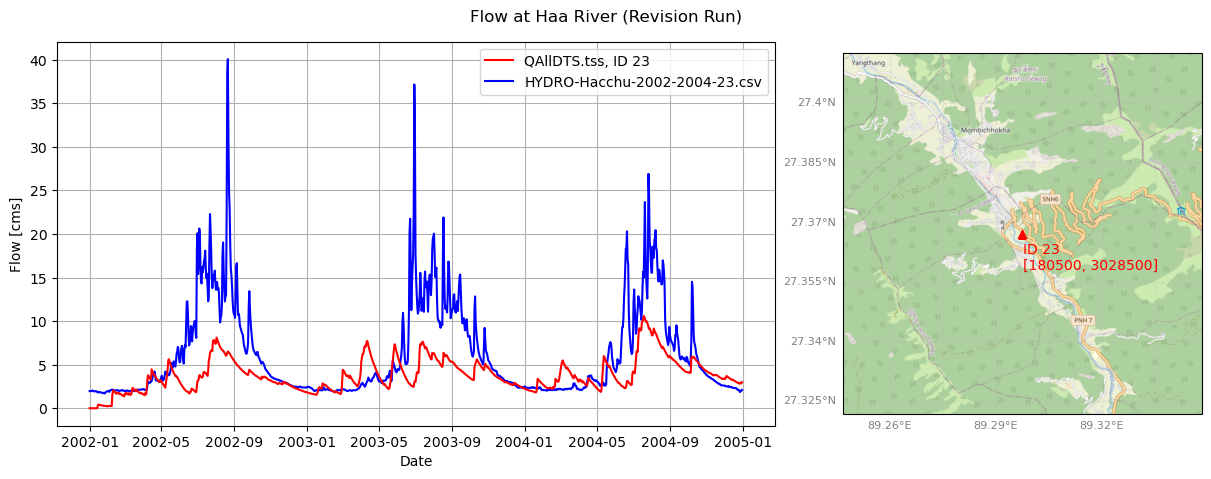

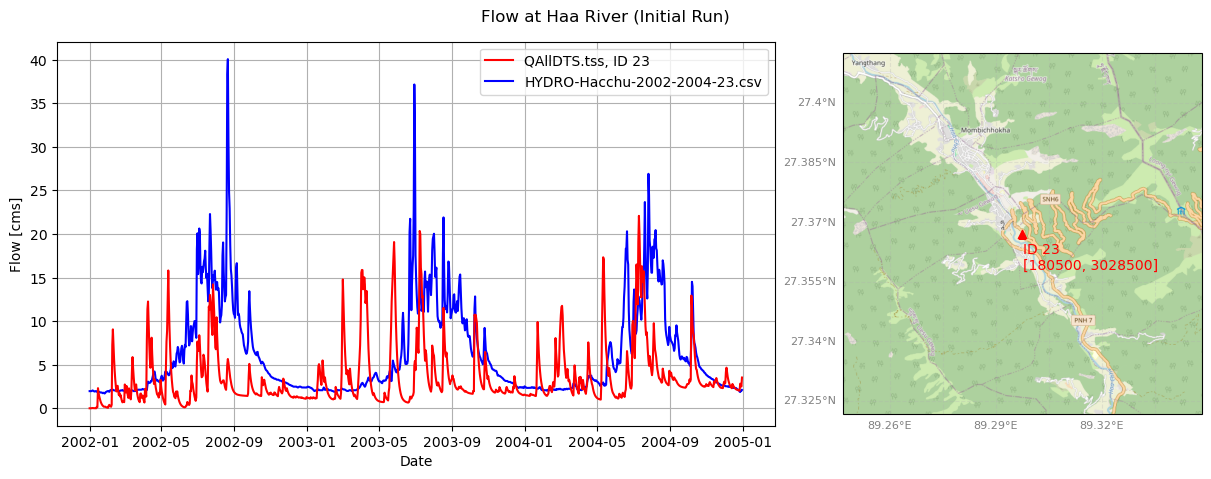

In [8]:
# at Hacchu
id_tss2 = 23 # Point ID
path_obs_tss2 = os.path.join('..', 'runs', 'HYDRO-Hacchu-2002-2004-23.csv') # observation timeseries to read
print(f'- Point ID in {path_PoI}:\n{id_tss2}')
print(f'- Path for Observaiton Timesereis :\n{path_obs_tss2}')

# Revision Run
output_tool.plot_tss(
    path_tss = path_tss_rev, # SPHY timeseries to plot
    id_outlet = id_tss2, # Point ID to plot
    startyear = startyear, # SPHY simulation start year
    startmonth = startmonth, # SPHY simulation start month
    startday = startday, # SPHY simulation start day
    path_obscsv = path_obs_tss2, # observation timeseries to plot together
    plot_map = True, # add a panel to plot the Point location on the map
    path_outletmap = path_PoI, # outlet.map that contains location information
    outletmap_epsg = epsg_model, # outlet.map EPSG
    basemap = cartopy.io.img_tiles.OSM(), # cartopy basemap (here, OpenStreetMap)
    basemap_level = 13, # cartopy basemap zoom level
    extent = 5000, # cartopy map extent, e.g., 5 km from the Point location
    figsize = (12, 5), # matplotlib figure size
    suptitle = 'Flow at Haa River (Revision Run)', # matplotlib figure title
    xlabel = 'Date', # matplotlib figure x-axis label
    ylabel = 'Flow [cms]', # matplotlib figure y-axis label
    savefig = None, # path to save the figure
    )

# Initial Run for Comparision
output_tool.plot_tss(
    path_tss = path_tss, # SPHY timeseries to plot
    id_outlet = id_tss2, # Point ID to plot
    startyear = startyear, # SPHY simulation start year
    startmonth = startmonth, # SPHY simulation start month
    startday = startday, # SPHY simulation start day
    path_obscsv = path_obs_tss2, # observation timeseries to plot together
    plot_map = True, # add a panel to plot the Point location on the map
    path_outletmap = path_PoI, # outlet.map that contains location information
    outletmap_epsg = epsg_model, # outlet.map EPSG
    basemap = cartopy.io.img_tiles.OSM(), # cartopy basemap (here, OpenStreetMap)
    basemap_level = 13, # cartopy basemap zoom level
    extent = 5000, # cartopy map extent, e.g., 5 km from the Point location
    figsize = (12, 5), # matplotlib figure size
    suptitle = 'Flow at Haa River (Initial Run)', # matplotlib figure title
    xlabel = 'Date', # matplotlib figure x-axis label
    ylabel = 'Flow [cms]', # matplotlib figure y-axis label
    savefig = None, # path to save the figure
    )

**RECAP**: There are several ways to improve the SPHY model predictions:
1. Apply a bias correction on the meteorological forcing inputs, leveraging long-term climate observations at meteorological stations.
2. Update the SPHY model domain inputs with the latest, accurate sources of information, e.g., DEM, soil/land classifications, and glacier inventory.
3. Calibrate the SPHY model hydrologic properties based on available observations, e.g., streamflow gauge measurements and remote sensing datasets.